<a href="https://colab.research.google.com/github/Abdullah-NI/ML-project/blob/main/10%20DL%20dog%20vs%20cat%20classification%20transfer%20learning/45_DL_project_3_dog_vs_cat_classification_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

extracting dataset using kaggle API

In [1]:
#installing the kaggle library
!pip install kaggle

In [2]:
#configureing the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/AllDataset/kaggle.json ~/.kaggle/    #kaggle.json file every time uploaded karni padegi after a certain time it expire then you have to downoaded again and uploaded it
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats


100% 811M/812M [00:32<00:00, 27.7MB/s]
100% 812M/812M [00:32<00:00, 26.2MB/s]


In [4]:
!ls

dogs-vs-cats.zip  drive  sample_data


In [5]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
#counting the number of file in train folder
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print('number of imeges: ',file_count)

number of imeges:  25000


printing the names of images

In [8]:
file_names=os.listdir('/content/train')
print(file_names)

['cat.6515.jpg', 'dog.2707.jpg', 'cat.4757.jpg', 'cat.8430.jpg', 'cat.4277.jpg', 'cat.4544.jpg', 'dog.5985.jpg', 'dog.8695.jpg', 'dog.7077.jpg', 'dog.4549.jpg', 'dog.9541.jpg', 'cat.2559.jpg', 'cat.4822.jpg', 'cat.3025.jpg', 'dog.8978.jpg', 'cat.11340.jpg', 'dog.3789.jpg', 'dog.1523.jpg', 'dog.11183.jpg', 'dog.9277.jpg', 'dog.4693.jpg', 'dog.7501.jpg', 'dog.6091.jpg', 'cat.9532.jpg', 'cat.5661.jpg', 'dog.8009.jpg', 'dog.7671.jpg', 'dog.3412.jpg', 'cat.9552.jpg', 'dog.11262.jpg', 'cat.10036.jpg', 'dog.2081.jpg', 'dog.4535.jpg', 'cat.7730.jpg', 'dog.9128.jpg', 'dog.6108.jpg', 'cat.1393.jpg', 'dog.5225.jpg', 'cat.2739.jpg', 'dog.4907.jpg', 'dog.5453.jpg', 'cat.6781.jpg', 'cat.384.jpg', 'cat.1214.jpg', 'dog.9723.jpg', 'dog.8974.jpg', 'cat.2519.jpg', 'dog.745.jpg', 'dog.8618.jpg', 'dog.3156.jpg', 'cat.4463.jpg', 'dog.12315.jpg', 'cat.11923.jpg', 'dog.703.jpg', 'dog.11792.jpg', 'cat.7125.jpg', 'dog.12080.jpg', 'cat.4691.jpg', 'dog.10947.jpg', 'cat.5912.jpg', 'dog.10501.jpg', 'cat.10377.jpg',

importing the dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the image of dog and cats

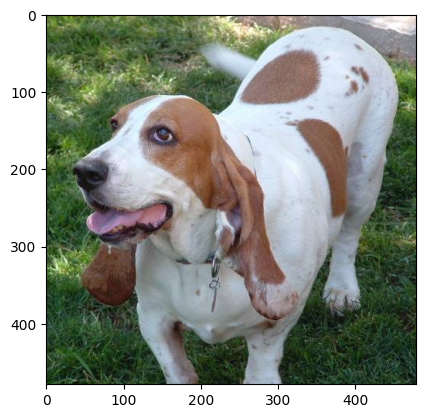

In [10]:
#displaying the dog
img=mping.imread('/content/train/dog.9541.jpg')
img_plot=plt.imshow(img)
plt.show()

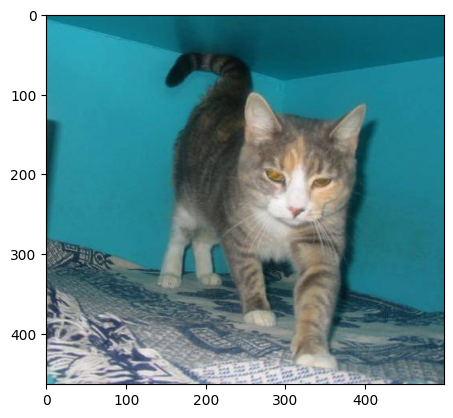

In [11]:
#displaying the cat
img=mping.imread('/content/train/cat.4757.jpg')
img_plot=plt.imshow(img)
plt.show()

In [12]:
file_names=os.listdir('/content/train')

for i in range(5):
  name=file_names[i]
  print(name)
  print(name[0:3])  # 0 to 2 index tak letter print kare

cat.6515.jpg
cat
dog.2707.jpg
dog
cat.4757.jpg
cat
cat.8430.jpg
cat
cat.4277.jpg
cat


In [13]:
file_names=os.listdir('/content/train')
dog_count=0
cat_count=0

for img_file in file_names:
  name=img_file[0:3]
  if name=='dog':
    dog_count+=1
  else:
    cat_count+=1

print('number of dog ',dog_count)
print('number of cat ',cat_count)

number of dog  12500
number of cat  12500


resizing all images

In [14]:
#creating a directory for resized image
os.mkdir('/content/image_resized')

In [15]:
original_folder='/content/train/'
resized_folder='/content/image_resized/'

for i in range(2000):   #taking 2000 image

  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224,224))

  newimg_path=resized_folder+filename
  img.save(newimg_path)



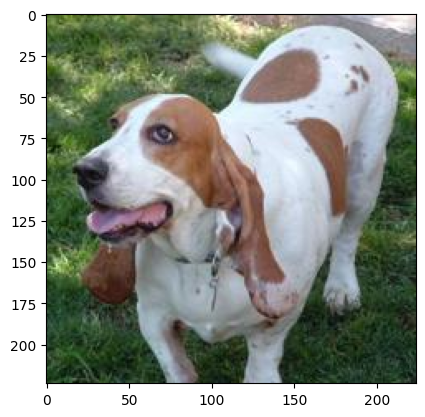

In [16]:
#displaying the resized image
img=mping.imread('/content/image_resized/dog.9541.jpg')
img_plot=plt.imshow(img)
plt.show()

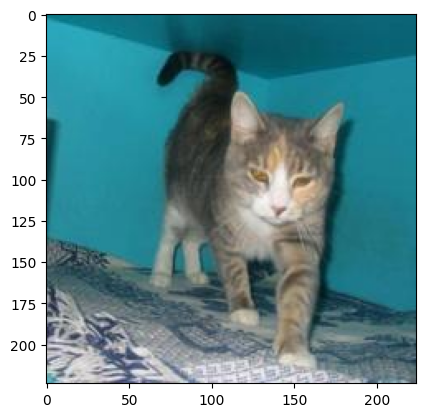

In [17]:
#displaying the cat resized
img=mping.imread('/content/image_resized/cat.4757.jpg')
img_plot=plt.imshow(img)
plt.show()

**creating label for resized images of dog and cat**

cat--->0

dog--->1

In [18]:
#creating for loop to assign label
filenames=os.listdir('/content/image_resized')
labels=[]

for i in range(2000):
  file_name=filenames[i]
  label=file_name[0:3]
  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)


In [19]:
print(filenames[0:5])
print(len(filenames))

['cat.6515.jpg', 'dog.2707.jpg', 'cat.4757.jpg', 'cat.8430.jpg', 'cat.4277.jpg']
2000


In [20]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 0, 0]
2000


In [21]:
#counting image of cats and dogs out of 2000 image
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[ 999 1001]


converting all resized image to numpy array


In [22]:
import cv2
import glob

In [23]:
image_directory='/content/image_resized/'
image_extension=['png','jpg']

files=[]

[files.extend(glob.glob(image_directory + '*' + e)) for e in image_extension]

dog_cat_images=np.asarray([cv2.imread(file) for file in files])



In [24]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [25]:
print(dog_cat_images)

[[[[ 50  30  42]
   [ 50  30  42]
   [ 51  32  41]
   ...
   [ 24  22  21]
   [ 26  23  18]
   [ 25  23  15]]

  [[ 51  31  43]
   [ 51  31  43]
   [ 51  31  43]
   ...
   [ 23  20  22]
   [ 25  21  20]
   [ 25  22  18]]

  [[ 52  32  45]
   [ 52  32  45]
   [ 53  33  46]
   ...
   [ 21  15  26]
   [ 23  16  23]
   [ 23  17  22]]

  ...

  [[172 133 171]
   [170 129 167]
   [171 123 165]
   ...
   [177 129 181]
   [177 129 181]
   [176 128 180]]

  [[185 138 171]
   [180 132 168]
   [179 129 169]
   ...
   [175 127 179]
   [175 127 179]
   [175 127 179]]

  [[194 144 176]
   [188 137 171]
   [187 136 174]
   ...
   [176 128 180]
   [176 128 180]
   [177 129 181]]]


 [[[ 98  91  98]
   [105  98 105]
   [105  98 103]
   ...
   [176 165 151]
   [180 169 155]
   [183 172 158]]

  [[105  98 105]
   [ 98  91  98]
   [ 94  88  93]
   ...
   [190 179 165]
   [189 178 164]
   [175 164 150]]

  [[103  99 105]
   [ 80  76  82]
   [ 78  74  79]
   ...
   [191 180 166]
   [196 185 171]
   [181 170

In [26]:
type(dog_cat_images)

numpy.ndarray

In [27]:
x=dog_cat_images
y=np.asarray(labels)

**train test split**

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600--->training images

400--->test images

In [30]:
#scaling the data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [31]:
print(x_train_scaled)

[[[[0.98431373 1.         1.        ]
   [0.98039216 0.99607843 1.        ]
   [0.96078431 0.97647059 0.98039216]
   ...
   [0.93333333 1.         0.97647059]
   [0.94509804 1.         0.98431373]
   [0.94509804 1.         0.98431373]]

  [[0.96078431 0.97647059 0.98039216]
   [0.96470588 0.98039216 0.98431373]
   [0.96470588 0.98039216 0.98431373]
   ...
   [0.9372549  1.         1.        ]
   [0.90588235 0.98039216 0.96862745]
   [0.86666667 0.94509804 0.9254902 ]]

  [[0.97647059 0.99607843 1.        ]
   [0.98039216 1.         1.        ]
   [0.98039216 1.         1.        ]
   ...
   [0.78039216 0.85490196 0.88235294]
   [0.8        0.8745098  0.90196078]
   [0.79215686 0.87058824 0.89019608]]

  ...

  [[0.45490196 0.38039216 0.47843137]
   [0.49019608 0.41568627 0.51372549]
   [0.41960784 0.34509804 0.44313725]
   ...
   [0.63137255 0.65882353 0.71764706]
   [0.64313725 0.6745098  0.7254902 ]
   [0.61960784 0.65098039 0.70196078]]

  [[0.44705882 0.37254902 0.47058824]
   [0.4

building the Neural Network

In [32]:
!pip uninstall tensorflow
!pip install tensorflow==2.15.0 tensorflow-hub keras

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.11/dist-packages/tensorflow-2.18.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.18.0
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [33]:
import tensorflow as tf
import tensorflow_hub as hub

In [34]:
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [35]:
num_of_class=2
model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_class)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [36]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [37]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 79s 1s/step - loss: 0.2069 - acc: 0.9119
Epoch 2/5
50/50 [==============================] - 81s 2s/step - loss: 0.0650 - acc: 0.9762
Epoch 3/5
50/50 [==============================] - 88s 2s/step - loss: 0.0473 - acc: 0.9850
Epoch 4/5
50/50 [==============================] - 95s 2s/step - loss: 0.0362 - acc: 0.9912
Epoch 5/5
50/50 [==============================] - 88s 2s/step - loss: 0.0311 - acc: 0.9925


In [38]:
score,acc=model.evaluate(x_test_scaled,y_test)
print('test loss',score)
print('test accuracy',acc)

13/13 [==============================] - 17s 1s/step - loss: 0.0741 - acc: 0.9675
test loss 0.07413273304700851
test accuracy 0.9674999713897705


**Predictive system**


path of the image to be predicted:/content/cat.jpg


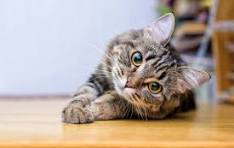

1/1 [==============================] - 0s 83ms/step
[[ 1.6659987 -5.1595483]]
0
the image is cat


In [42]:
input_image_path=input('path of the image to be predicted:')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize=cv2.resize(input_image,(224,224))

input_image_scaled=input_image_resize/225

image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])

input_prediction=model.predict(image_reshaped)

print(input_prediction)

input_prediction_label=np.argmax(input_prediction)

print(input_prediction_label)

if input_prediction_label==0:
  print('the image is cat')
else:
  print('the image is dog')
